# Task is to first do min max scaling and then validate the model using k fold cross validation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
Churn = pd.read_csv('D:/iAnalyst/Machine Learning/Logistic Regression/Churn_Modelling.csv')
df=Churn.copy()
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Exploratory Data Analysis

In [3]:
Churn.isnull() 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

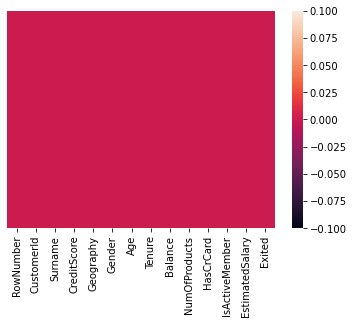

In [4]:
sns.heatmap(df.isnull(),yticklabels=False)#,cbar=True,cmap='viridis')   #no missing cases

<AxesSubplot:xlabel='Exited', ylabel='count'>

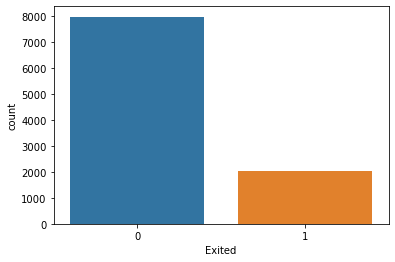

In [5]:
sns.countplot(x='Exited',data=df)

<AxesSubplot:xlabel='Exited', ylabel='count'>

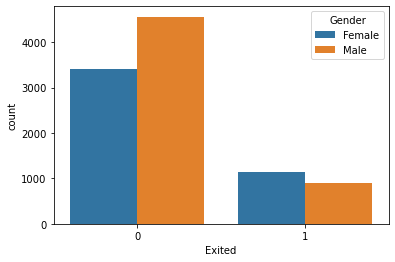

In [6]:
sns.countplot(x='Exited',hue='Gender',data=df)

<AxesSubplot:xlabel='Exited', ylabel='count'>

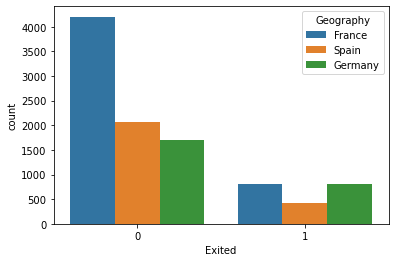

In [7]:
sns.countplot(x='Exited', hue='Geography', data=df)

# Data cleaning

In [8]:
to_drop=['RowNumber','CustomerId','Surname']   #not needed
df=df.drop(to_drop,axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<AxesSubplot:xlabel='Gender', ylabel='Balance'>

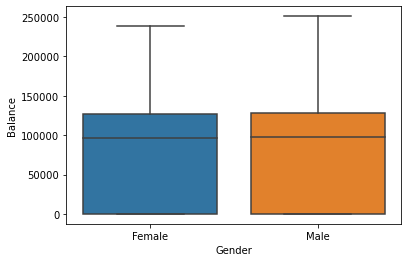

In [9]:
sns.boxplot(x='Gender',y='Balance',data=df)

<AxesSubplot:xlabel='Geography', ylabel='Balance'>

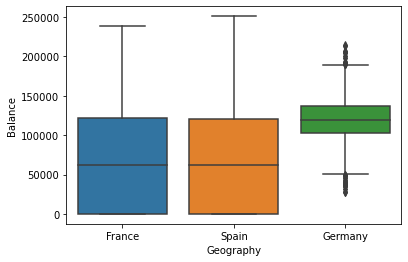

In [10]:
sns.boxplot(x='Geography',y='Balance',data=df)

##Using min max feature engineering.

##using it for columns which have huge numbers such as credit score, balance and estimated salary

In [11]:
minmax=['CreditScore','Balance','EstimatedSalary']

for i in minmax:
    df[i]=(df[i]-df[i].min())/(df[i].max()-df[i].min())

In [54]:
df.Balance.head()

0    0.000000
1    0.334031
2    0.636357
3    0.000000
4    0.500246
Name: Balance, dtype: float64

In [13]:
Gender = pd.get_dummies(df['Gender'],drop_first=True)   #It uses one-hot encoding. Convert categorical variable into dummy/indicator variables.
Geo = pd.get_dummies(df['Geography'],drop_first=True)   #we use drop first as we delete the first column generated. If we get male=0 then it is known that person is female. so no need for another column to mention female=1. Hence deleting this unnecessary coln.

In [14]:
Geo.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [15]:
df.drop(['Gender','Geography'],axis=1,inplace=True)  #deleting the existing colmns and adding the one-hot encoded ones.
pd.concat([df,Gender,Geo],axis=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,0.538,42,2,0.000000,1,1,1,0.506735,1,0,0,0
1,0.516,41,1,0.334031,1,0,1,0.562709,0,0,0,1
2,0.304,42,8,0.636357,3,1,0,0.569654,1,0,0,0
3,0.698,39,1,0.000000,2,0,0,0.469120,0,0,0,0
4,1.000,43,2,0.500246,1,1,1,0.395400,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,39,5,0.000000,2,1,0,0.481341,0,1,0,0
9996,0.332,35,10,0.228657,1,1,1,0.508490,0,1,0,0
9997,0.718,36,7,0.000000,1,0,1,0.210390,1,0,0,0
9998,0.844,42,3,0.299226,2,1,0,0.464429,1,1,1,0


In [16]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,42,2,0.000000,1,1,1,0.506735,1
1,0.516,41,1,0.334031,1,0,1,0.562709,0
2,0.304,42,8,0.636357,3,1,0,0.569654,1
3,0.698,39,1,0.000000,2,0,0,0.469120,0
4,1.000,43,2,0.500246,1,1,1,0.395400,0


In [17]:
##BUILDING A LOGISTIC REGRESSION MODEL

In [18]:
##K-fold cross validation

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedKFold 
from sklearn.metrics import roc_auc_score

kf = RepeatedKFold(n_splits=5, n_repeats=1, random_state=None) 


X=df.drop('Exited',axis=1)
Y=df['Exited']

for train_index, test_index in kf.split(df):
    #print("Train:", train_index, "Validation:",test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]   #we take iloc as we have train index as rows
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    logmodel = LogisticRegression(solver='liblinear')  #you can keep default= blank
    
    logmodel.fit(X_train,y_train)  
    predict= logmodel.predict(X_test)
    
    print(roc_auc_score(y_test, predict))  #calculating roc scores for each model

0.5591898926854221
0.572352983430706
0.5534380870847304
0.5686530504900602
0.5666479031804109


Training and PRedicting

In [21]:
logmodel.coef_

array([[-0.38795023,  0.07301225, -0.02551029,  1.24732658, -0.02750154,
        -0.09110361, -1.114611  ,  0.12192989]])

In [22]:
predictions = logmodel.predict(X_test) 
#predictions = logmodel.predict_proba(X_test)

In [43]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
pd.crosstab(predictions,y_test)   #confusion matrix

Exited,0,1
row_0,,
0,1528,356
1,87,29


Evaluation

In [45]:
from sklearn.metrics import classification_report,confusion_matrix

In [46]:
print(confusion_matrix(y_test,predictions))

[[1528   87]
 [ 356   29]]


In [47]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      1615
           1       0.25      0.08      0.12       385

    accuracy                           0.78      2000
   macro avg       0.53      0.51      0.49      2000
weighted avg       0.70      0.78      0.73      2000



In [48]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, predictions)
logit_roc_auc

0.5107273531422137

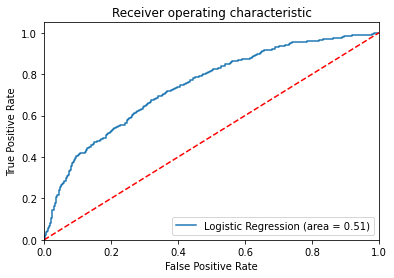

In [49]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, predictions)
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [50]:
roc_auc_score(y_test, logmodel.predict(X_test))   #predicting on the test data

0.5666479031804109

In [51]:
logmodel.predict_proba(X_test)

array([[0.89330763, 0.10669237],
       [0.77551489, 0.22448511],
       [0.94291466, 0.05708534],
       ...,
       [0.47359008, 0.52640992],
       [0.83021254, 0.16978746],
       [0.71236466, 0.28763534]])

In [52]:
logmodel.predict_proba(X_test)[:,1]

array([0.10669237, 0.22448511, 0.05708534, ..., 0.52640992, 0.16978746,
       0.28763534])

In [53]:
logmodel.predict_proba(X_test)[:,1]>0.4

array([False, False, False, ...,  True, False, False])

In [34]:
logical=logmodel.predict_proba(X_test)[:,1]>0.21
logical

array([False, False, False, ..., False, False,  True])

In [35]:
pred=[0]*np.size(logical)
for i in np.arange(0,np.size(logical)):
        if logical[i]==True:
            pred[i]=1   

In [36]:
roc_auc_score(y_test,pred)    

0.6521053259243493

In [37]:
print(confusion_matrix(y_test,pred))

[[1096  485]
 [ 163  256]]


In [38]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.69      0.77      1581
           1       0.35      0.61      0.44       419

    accuracy                           0.68      2000
   macro avg       0.61      0.65      0.61      2000
weighted avg       0.76      0.68      0.70      2000



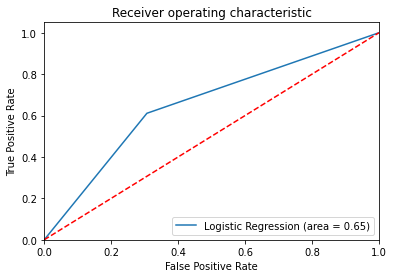

In [39]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, pred)
fpr, tpr, thresholds = roc_curve(y_test, pred)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()